# Graded Challenge 1 Phase 1

## 1. Introduction

- Name: Alexander Prasetyo Christianto
- Last Education: Electrical Engineering Bachelor Degree
- Occupation: Full Time Data Science Bootcamp Student at Hacktiv8
- Batch: 001


**Problem Statement**

Uber and Lyft wants to adjust their pricing based on some features from their dataset. They want to use Linear Regression as their method to find the pricing based on some parameters.


**Key Objectives**

- What are the factors that may influence the pricing rate?
- How much is the predicted price based on the used features?


**About Dataset**

This is a very beginner-friendly dataset. It does contain some of NA values. It is a good dataset if you want to use a Linear Regression Model to see the pattern between different predectors such as hour and price.

This dataset was obtained from https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma

## 2. Importing Libraries

Importing the libraries that we are going to use in this analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

## 3. Data Loading

Here, i load the data into my workspace with the name of `data`.

In [2]:
data = pd.read_csv('rideshare_kaggle.csv')

And here are the first 5 rows and the latest 5 rows of the data

In [3]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
data.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Before beginning the work and analysis, i copied the dataset into `data_duplicate` for my analysis and work safety also for another purposes if needed.

In [5]:
# Duplication of original dataset for safety purposes

data_duplicate = data.copy()

## 4. Data Cleaning

It has been always a necessary step to check the info of the data. I am checking `data` info to get total rows count and dtype in each column.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

I am seeing that from `price` column the total rows count is different from the other column. Let us check if `price` column has null-values.

In [7]:
# Checking Null Values

data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Turns out there are 55095 of rows that contains null-value in `price` column. I am straight going to drop those rows because those rows are located in `price` column, whereas I want to use that column as the target of the machine learning model.

In [8]:
# Dropping Null Value

data.dropna(inplace=True)

After dropping the null-value rows, it is good to do a double-check on the data. So here I am checking if my data is clean from null-value.

In [9]:
# Data cross checking after dropping null value 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

There are 637976 rows and 57 columns in my data.

Also I am not forgetting to check any rows duplication

In [10]:
# Checking duplicated values

data.duplicated().any()

False

Next there are some few things I want to do. I am going to:

- Change some columns with dtype of object to category
- Change some columns with dtype of object to datetime and timestamp
- Dropping some columns

I am changing several columns to category dtype for saving up some memory and performance.

In [11]:
# Changing data dtypes

data['timezone'] = data.timezone.astype('category')
data['source'] = data.source.astype('category')
data['destination'] = data.destination.astype('category')
data['cab_type'] = data.cab_type.astype('category')
data['product_id'] = data.product_id.astype('category')
data['name'] = data.name.astype('category')
data['short_summary'] = data.short_summary.astype('category')
data['long_summary'] = data.long_summary.astype('category')
data['icon'] = data.icon.astype('category')
data['datetime'] = pd.to_datetime(data.datetime)
data['timestamp'] = pd.to_datetime(data.timestamp, unit='s')

From looking the dataset, there are several columns that ends with 'Time' and I notice that the value in those columns are in Unix timestamp format. Therefore, I am changin it into datetime format.

In [12]:
# Converting unix time in several columns to timestamp

cols = data.loc[:,data.columns.str.endswith('Time')]

for i in cols:
    data[i] = pd.to_datetime(data[i], unit='s')

And here is the result.

In [13]:
data.head(4)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07.890000128,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,2018-12-16 17:00:00,39.89,2018-12-17 02:00:00,43.68,2018-12-16 14:00:00,33.73,2018-12-17 02:00:00,38.07,2018-12-16 11:00:00
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23.676999936,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,2018-11-26 17:00:00,40.49,2018-11-26 12:00:00,47.30,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,43.92,2018-11-26 17:00:00
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22.197999872,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,2018-11-27 17:00:00,35.36,2018-11-28 04:00:00,47.55,2018-11-27 12:00:00,31.04,2018-11-28 04:00:00,44.12,2018-11-27 12:00:00
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02.749000192,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,2018-11-29 16:00:00,34.67,2018-11-30 04:00:00,45.03,2018-11-29 17:00:00,30.30,2018-11-30 04:00:00,38.53,2018-11-29 17:00:00


Now, if I look closely, there is something worth to note down because I found an anomaly. Let us see at `timestamp`, `hour`, `day`, `month`, `datetime` and any columns that ends with 'Time' (for example) `temperatureMinTime` column. The date and time that is contained in `temperatureMinTime` column is 1 day behind with the time and date in column `timestamp`, `hour`, `day`, `month`, `datetime`.

I don't have any assumption on why there is 1 day difference between those columns so I decided to drop and not to use those columns that ends with 'Time' because it may give a biased analysis or unaccurate analysis.

In [14]:
# Dropping every column that is related with timestamp

data.drop([x for x in data if x.endswith('Time')], 1, inplace=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_29604\938165316.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop([x for x in data if x.endswith('Time')], 1, inplace=True)


I am also going to drop the `latitude` and `longitude` column because the coordinates doesnt represent the actual place. Here is the image

<img src="Map.PNG">

According to the dataset, the source of an order was coming from Haymarket Square and the destination was North Station. But when I put the lat and long coordinates in Google Maps, the coordinates don't represent Haymarket Square nor North Station. And after trying some other coordinates, not all of lat and long coordinates are wrong. Some still represents the actual location. But I chose to drop `latitude` and `longitude` column to avoid biased analysis.

In [15]:
data.drop(['latitude', 'longitude'], axis=1, inplace=True)

Based on my knowledge and assumption, there are redundant columns that need to be dropped. I assume these columns don't have any influence to Uber and Lyft pricing. These columns are:

- `humidity`
- `dewPoint`
- `pressure`
- `cloudCover`
- `uvIndex`
- `ozone`
- `moonPhase`

In [16]:
data.drop(['humidity', 'dewPoint', 'pressure', 'cloudCover', 'uvIndex', 'ozone', 'moonPhase'], axis=1, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       637976 non-null  object        
 1   timestamp                637976 non-null  datetime64[ns]
 2   hour                     637976 non-null  int64         
 3   day                      637976 non-null  int64         
 4   month                    637976 non-null  int64         
 5   datetime                 637976 non-null  datetime64[ns]
 6   timezone                 637976 non-null  category      
 7   source                   637976 non-null  category      
 8   destination              637976 non-null  category      
 9   cab_type                 637976 non-null  category      
 10  product_id               637976 non-null  category      
 11  name                     637976 non-null  category      
 12  price           

By checking the info of my dataset, now my dataset contains 36 columns and still 637976 rows.

## 5. Exploratory Data Analysis (EDA)

In this section, there will be checking between features. The features to be checked are numerical features against other numerical features (avoiding multicollinearity) which then the results of the checking will be checked against the target feature. In addition, there will also be a categorical feature check against the feature target. The categorical features that are checked are only those features which, according to my assumption, may have a correlation with the target feature.

**Numerical Features on Numerical Features**

Now, I want to check `temperature` to other features that is correlated to temperature.

<AxesSubplot:>

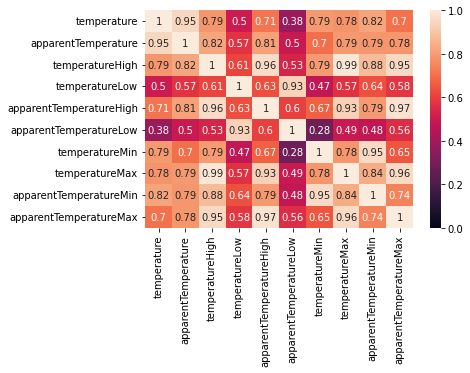

In [18]:
# checking features correlation that is related to temperature

sns.heatmap(data[['temperature', 'apparentTemperature', 'temperatureHigh', 
'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 
'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']].corr(), vmin=0, vmax=1, annot=True)

As we can see from the heatmap above, all features that named using 'temperature' have high correlation value to `temperature`. As a result those features need to be dropped because if not it will cause multicollinearity.

Now, I want to check the climate related feature correlation

<AxesSubplot:>

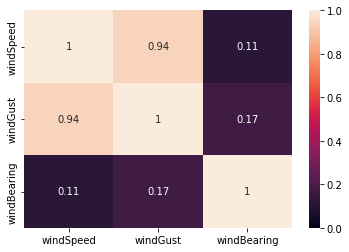

In [19]:
# checking features correlation that is related to wind

sns.heatmap(data[['windSpeed', 'windGust', 'windBearing']].corr(), vmin=0, vmax=1, annot=True)

From the heatmap above, the feature that needs to be dropped is `windGust`.

<AxesSubplot:>

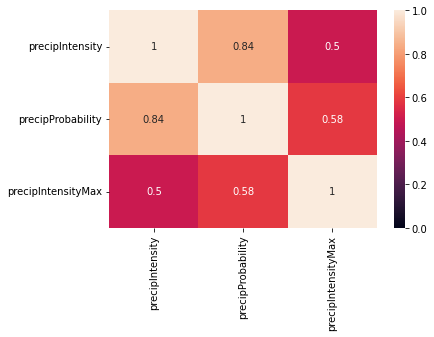

In [20]:
# checking features correlation that is related to precipitation

sns.heatmap(data[['precipIntensity', 'precipProbability', 'precipIntensityMax']].corr(), vmin=0, vmax=1, annot=True)

Like before, I want check precipitation features correlation. And from the heatmap above, the features that need to be dropped are `precipProbability` and `precipIntensityMax`.

<AxesSubplot:>

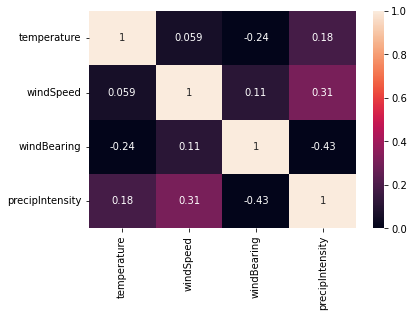

In [21]:
sns.heatmap(data[['temperature', 'windSpeed', 'windBearing','precipIntensity']].corr(), vmin=0, vmax=1, annot=True)

From the heatmap above, it seems that `windSpeed` and `precipIntensity` has the highest correlation value amongst others. I will drop `windSpeed` because I am assuming that precipitation has more effects to Uber and Lyft pricing compared to wind speed.

Now it's time to check numerical features correlation to `price`.

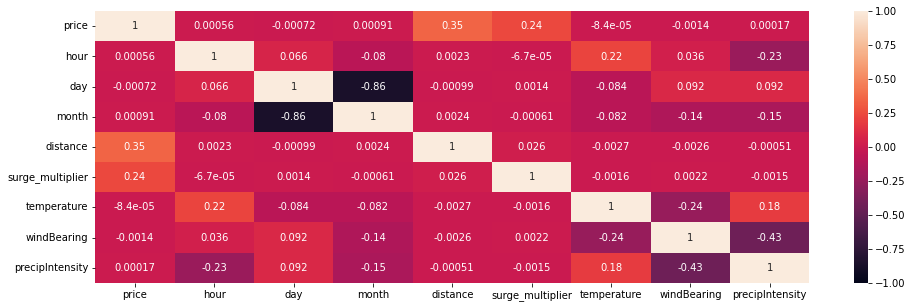

In [22]:
# checking features correlation to the target
plt.figure(figsize=(16,5))

ax = sns.heatmap(data[['price', 'hour', 'day', 'month', 'distance', 'surge_multiplier', 'temperature', 'windBearing', 'precipIntensity']].corr(), vmin=-1, vmax=1, annot=True)

Based on the heatmap above, I will be keeping `distance` and `surge_multiplier` because those 2 features has the highest correlation value compared to other features.

The numerical features that I am going to use is `distance` and `surge_multiplier`.

**Categorical Features to Target Feature**

Now I will look for categorical features that have a correlation with the target feature. The categorical features I want to find out are features `icon`, `name`, `product_id`, `cab_type`, `short_summary`. Then based on the results of checking, I will choose features that have a good correlation value with the target feature.

I am using One Hot Encoding method to check the correlation and I am doing this on a new variable which is separated from `data` variable to avoid data leakage.

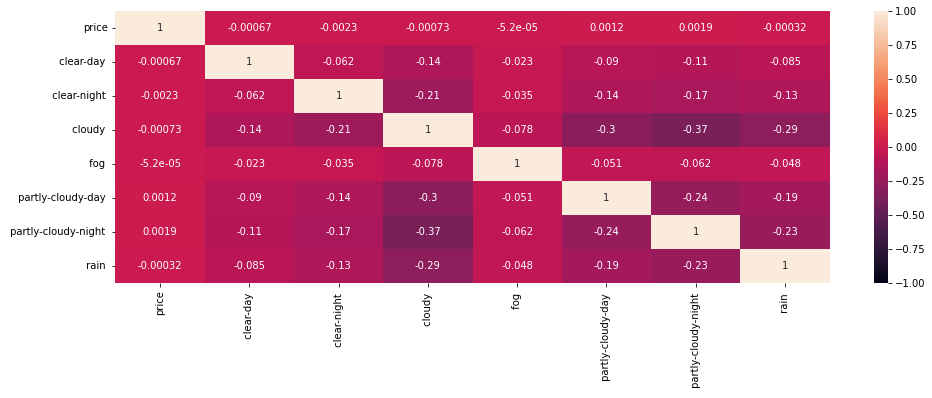

In [23]:
oh_enc = pd.DataFrame(data[['price', 'icon']])
icon_oh_enc = pd.get_dummies(oh_enc.icon)
oh_enc = pd.concat([oh_enc, icon_oh_enc], axis=1)
plt.figure(figsize= (16,5))

ax = sns.heatmap(oh_enc.corr(), vmin=-1, vmax=1, annot=True)

Turns out `icon` has low correlation to feature so I will drop `icon`.

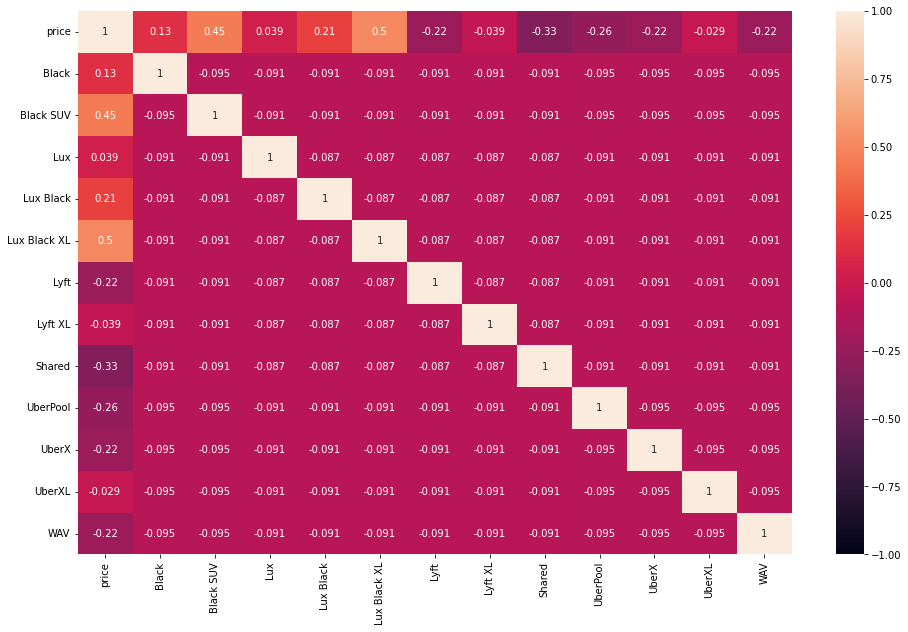

In [24]:
oh_enc_2 = pd.DataFrame(data[['price', 'name']])
name_oh_enc = pd.get_dummies(oh_enc_2.name)
oh_enc_2 = pd.concat([oh_enc_2, name_oh_enc], axis=1)
plt.figure(figsize= (16,10))

ax = sns.heatmap(oh_enc_2.corr(), vmin=-1, vmax=1, annot=True)

Some labels from `name` has good value of correlation to `price`. For now, I am not going to drop `name` feature.

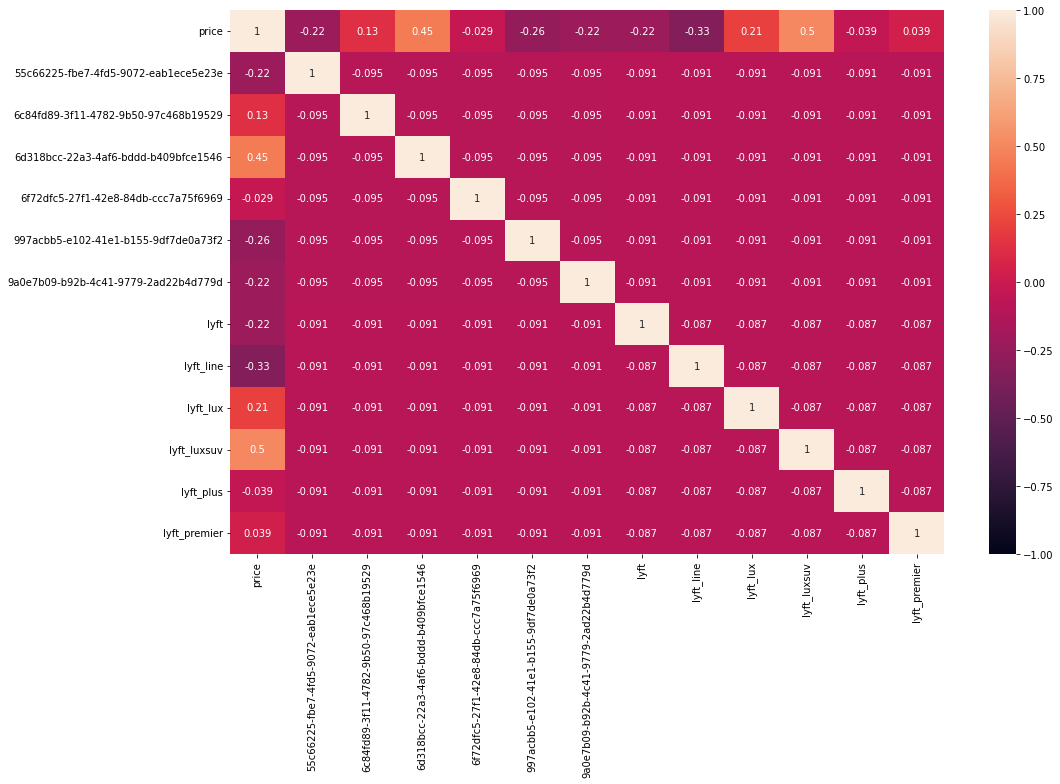

In [25]:
oh_enc_3 = pd.DataFrame(data[['price', 'product_id']])
product_oh_enc = pd.get_dummies(oh_enc_3.product_id)
oh_enc_3 = pd.concat([oh_enc_3, product_oh_enc], axis=1)
plt.figure(figsize=(16,10))
ax = sns.heatmap(oh_enc_3.corr(), vmin = -1, vmax=1, annot=True)

The labels in `product_id` has low correlation value relative to `price`. These feature also contain unknown labels, so I will drop this feature.

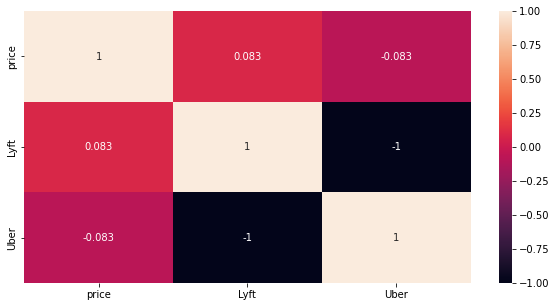

In [26]:
oh_enc_4 = pd.DataFrame(data[['price', 'cab_type']])
cab_type_oh_enc = pd.get_dummies(oh_enc_4.cab_type)
oh_enc_4 = pd.concat([oh_enc_4, cab_type_oh_enc],axis=1)
plt.figure(figsize=(10,5))
ax = sns.heatmap(oh_enc_4.corr(), vmin=-1, vmax=1, annot=True)

`cab_type` also has low correlation to price, I'm also going to drop `cab_type`.

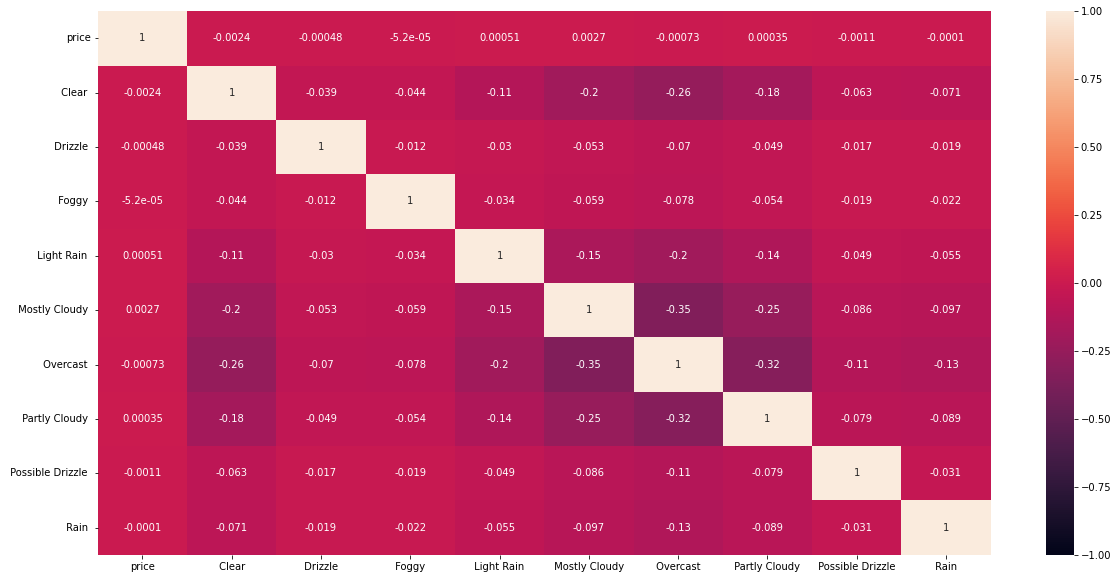

In [27]:
oh_enc_5 = pd.DataFrame(data[['price', 'short_summary']])
short_sum_oh_enc = pd.get_dummies(oh_enc_5.short_summary)
oh_enc_5 = pd.concat([oh_enc_5, short_sum_oh_enc], axis=1)
plt.figure(figsize=(20,10))

ax = sns.heatmap(oh_enc_5.corr(), vmin=-1, vmax=1, annot=True)

`short_summary` also going to be dropped. No labels in it that has good correlation value to `price`.

From the analysis above, the categorical feature that i am going to use is `name`.

## 6. Data Cleaning After EDA

This section is made for cleaning or dropping the unneeded features based on the EDA.

In [28]:
# dropping unwanted columns based on EDA

data.drop(['apparentTemperature', 'temperatureHigh', 
'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 
'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax', 'windSpeed',
'windGust', 'windBearing', 'precipProbability', 
'precipIntensityMax', 'temperature', 'precipIntensity', 'visibility', 'visibility.1'], axis=1, inplace=True)

In [29]:
data.drop(['icon', 'cab_type', 'short_summary', 'long_summary'],axis=1, inplace=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                637976 non-null  object        
 1   timestamp         637976 non-null  datetime64[ns]
 2   hour              637976 non-null  int64         
 3   day               637976 non-null  int64         
 4   month             637976 non-null  int64         
 5   datetime          637976 non-null  datetime64[ns]
 6   timezone          637976 non-null  category      
 7   source            637976 non-null  category      
 8   destination       637976 non-null  category      
 9   product_id        637976 non-null  category      
 10  name              637976 non-null  category      
 11  price             637976 non-null  float64       
 12  distance          637976 non-null  float64       
 13  surge_multiplier  637976 non-null  float64       
dtypes: c

Now after cleaning features, my dataset has 14 columns and 637976 rows.

### Feature Selection

From my personal judgement, I am going to drop more features that currently unrelated to the model. The features i am going to drop are `id`, `timestamp`, `hour`, `day`, `month`, `datetime`, `timezone`, `source`, `destination`, `product_id`

In [31]:
data_clean = pd.DataFrame(data.drop(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
'source', 'destination', 'product_id'], axis=1))

In [32]:
data_clean

,name,price,distance,surge_multiplier
0,Shared,5.0,0.44,1.0
1,Lux,11.0,0.44,1.0
2,Lyft,7.0,0.44,1.0
3,Lux Black XL,26.0,0.44,1.0
4,Lyft XL,9.0,0.44,1.0
...,...,...,...,...
693065,WAV,9.5,1.00,1.0
693066,UberXL,13.0,1.00,1.0
693067,UberX,9.5,1.00,1.0
693069,Black SUV,27.0,1.00,1.0


Now, I have a data frame only containing the features I need.

## 7. Data Preprocessing

In this section, there will be some things I am going to do. Starting from making the inference model from the data, splitting test and train data, handling the outliers, splitting numerical and categorical features, scaling the numerical features and encode the categorical features.

### Inference Model

In [33]:
# Get Data for Model Inference

data_clean_inf = data_clean.sample(10, random_state=1)
data_clean_inf


,name,price,distance,surge_multiplier
658311,Lyft XL,16.5,2.16,1.0
547209,Lyft,10.5,2.25,1.0
225076,UberX,8.0,1.56,1.0
360104,Shared,3.5,0.74,1.0
635115,Lux Black,26.0,3.14,1.0
242997,Lyft XL,16.5,2.87,1.0
65152,Lyft XL,16.5,2.52,1.0
412583,Shared,10.5,3.04,1.0
345318,Lux,16.5,2.12,1.0
84965,UberXL,17.5,2.66,1.0


For the inference model, I only took 10 random data and the data that was taken for the inference model will be dropped from the dataset.

In [34]:
data_clean_inf_final = data_clean_inf.drop('price', axis=1)
data_clean_inf_target = data_clean_inf['price']
data_clean_inf_final

,name,distance,surge_multiplier
658311,Lyft XL,2.16,1.0
547209,Lyft,2.25,1.0
225076,UberX,1.56,1.0
360104,Shared,0.74,1.0
635115,Lux Black,3.14,1.0
242997,Lyft XL,2.87,1.0
65152,Lyft XL,2.52,1.0
412583,Shared,3.04,1.0
345318,Lux,2.12,1.0
84965,UberXL,2.66,1.0


### Dropping Inference from Data

In [35]:
# Remove Inference-Set from Dataset

data_train_test = data_clean.drop(data_clean_inf.index)
data_train_test

,name,price,distance,surge_multiplier
0,Shared,5.0,0.44,1.0
1,Lux,11.0,0.44,1.0
2,Lyft,7.0,0.44,1.0
3,Lux Black XL,26.0,0.44,1.0
4,Lyft XL,9.0,0.44,1.0
...,...,...,...,...
693065,WAV,9.5,1.00,1.0
693066,UberXL,13.0,1.00,1.0
693067,UberX,9.5,1.00,1.0
693069,Black SUV,27.0,1.00,1.0


In [36]:
data_train_test.reset_index(drop=True, inplace=True) 
data_clean_inf.reset_index(drop=True, inplace=True)

After dropping the inference model, I am also going to take out the target feature from the data and put it into a new variable.

### Splitting Train and Test Data

Here, I am splitting my data for train and test data with a ratio of 80% and 20% from the total data.

In [37]:
X = data_train_test.drop('price', axis=1) 
y = data_train_test['price']
X

,name,distance,surge_multiplier
0,Shared,0.44,1.0
1,Lux,0.44,1.0
2,Lyft,0.44,1.0
3,Lux Black XL,0.44,1.0
4,Lyft XL,0.44,1.0
...,...,...,...
637961,WAV,1.00,1.0
637962,UberXL,1.00,1.0
637963,UberX,1.00,1.0
637964,Black SUV,1.00,1.0


In [38]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (510372, 3)
Test Size  :  (127594, 3)


The train data contains 510372 rows and 3 columns. The test data contains 127594 rows and 3 columns.

### Checking Null Values in Train and Test Data

I also need to check the null values in my train and test data.

In [39]:
X_train.isnull().sum()

name                0
distance            0
surge_multiplier    0
dtype: int64

In [40]:
X_test.isnull().sum()

name                0
distance            0
surge_multiplier    0
dtype: int64

In [41]:
y_train.isnull().sum()

0

In [42]:
y_test.isnull().sum()

0

And fortunately there are no null-values in my train and test data.

### Handling Numerical Features Outliers

In [43]:
X_train['distance'].skew()

0.819308985461679

In [44]:
X_train['surge_multiplier'].skew()

7.939273606994931

As we can see, the numerical features on the `X_train` data is skewed especially `surge_multiplier`. I am going to handle these outliers by using capping method.

Text(0.5, 1.0, 'Histogram of Surge Multiplier')

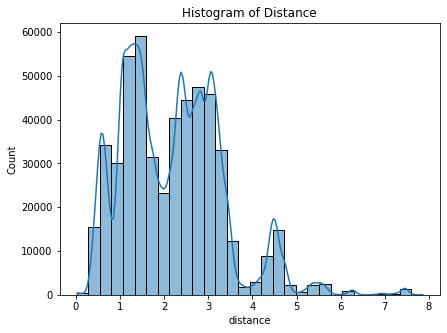

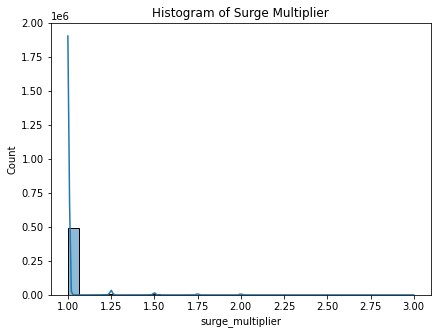

In [45]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['distance'], bins=30, kde=True)
plt.title('Histogram of Distance')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['surge_multiplier'], bins=30, kde=True)
plt.title('Histogram of Surge Multiplier')

Those 2 charts above are the visualization of data distribution of `distance` and `surge_multiplier`. Data `distance` has a right skew data distribution type as well as `surge_multiplier` has an extreme right skew.

In [46]:
def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return lower_bound, upper_bound

In [47]:
# mencari outlier untuk distance

lower_bound, upper_bound = find_skew_bound(X_train, 'distance', 1.5)
lower_bound, upper_bound

print('Lower Bound distance:',lower_bound)
print('Upper Bound distance:',upper_bound)
print('Counts of Outlier at distance = {}'.format(len(X_train[X_train['distance'] > upper_bound])))
print('Outlier Percentage at distance = {:.2%}'.format(len(X_train[X_train['distance'] > upper_bound]) / len(X_train)))

Lower Bound distance: -1.2200000000000002
Upper Bound distance: 5.42
Counts of Outlier at distance = 5321
Outlier Percentage at distance = 1.04%


In [48]:
# mencari outlier untuk surge_multiplier

lower_bound, upper_bound = find_skew_bound(X_train, 'surge_multiplier', 3)
lower_bound, upper_bound

print('Lower Bound surge_multiplier:',lower_bound)
print('Upper Bound surge_multiplier:',upper_bound)
print('Counts of Outlier at surge_multiplier = {}'.format(len(X_train[X_train['surge_multiplier'] > upper_bound])))
print('Outlier Percentage at surge_multiplier = {:.2%}'.format(len(X_train[X_train['surge_multiplier'] > upper_bound]) / len(X_train)))

Lower Bound surge_multiplier: 1.0
Upper Bound surge_multiplier: 1.0
Counts of Outlier at surge_multiplier = 16808
Outlier Percentage at surge_multiplier = 3.29%


Now it can be seen that the numerical features have a right skewed data distribution. In handling outliers on this data, the method I will use is the capping/sensoring method. I handle outliers with this method because I don't want to lose existing data. Outlier handling will only be done on the numerical feature `distance`, while the numerical feature `surge_multiplier` will not handle outliers because if `surge_multiplier` is capped then I will lose the pattern or data pattern that is in that feature. A value of 1 will replace all existing values in the `surge_multiplier` feature because the upper and lower limits of `surge_multiplier` are 1 based on the calculations that have been done.

In [49]:
#Handling outlier with capping method

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['distance'])

windsoriser.fit(X_train)

X_train_transformed = windsoriser.transform(X_train)

In [50]:
# Inspect the minimum caps for each variable

print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable

print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'distance': -1.2200000000000002}
Right Tail Caps :  {'distance': 5.42}


In [51]:
print('X_train Dataframe - Before Capping')
print(X_train.describe())
print('')
print('X_train Dataframe - After Capping')
print(X_train_transformed.describe())

X_train Dataframe - Before Capping
            distance  surge_multiplier
count  510372.000000     510372.000000
mean        2.187110          1.015093
std         1.135745          0.095423
min         0.020000          1.000000
25%         1.270000          1.000000
50%         2.150000          1.000000
75%         2.930000          1.000000
max         7.860000          3.000000

X_train Dataframe - After Capping
            distance  surge_multiplier
count  510372.000000     510372.000000
mean        2.178259          1.015093
std         1.103903          0.095423
min         0.020000          1.000000
25%         1.270000          1.000000
50%         2.150000          1.000000
75%         2.930000          1.000000
max         5.420000          3.000000


The skew value in the `distance` and `surge_multiplier` features has changed after the outlier has been handled.

In [52]:
X_train_transformed['distance'].skew()

0.589906890199906

In [53]:
X_train_transformed['surge_multiplier'].skew()

7.939273606994931

### Splitting Numerical and Categorical Columns

Now I will separate the numerical column and categorical column to perform scaling on the numerical column and encoding on the categorical column.

In [54]:
num_columns = X_train_transformed.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train_transformed.select_dtypes(include=['category']).columns.to_list()

print('Numerical Columns:', num_columns)
print('Categorical Columns:', cat_columns)

Numerical Columns: ['distance', 'surge_multiplier']
Categorical Columns: ['name']


In [55]:
X_train_num = X_train_transformed[num_columns]
X_train_cat = X_train_transformed[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

### Scaling Numerical Features

Feature scaling is done to bring all features in the same standing, I need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

In [56]:
X_train_num

,distance,surge_multiplier
224722,1.30,1.0
483389,4.79,1.0
593025,2.40,1.0
164048,0.39,1.0
316033,2.14,1.0
...,...,...
371403,3.19,1.5
491263,1.05,1.0
470924,1.57,1.0
491755,3.05,1.0


The scaling method that I used is Min Max Scaler because the data in `X_train_num` is still right skewed.

In [57]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.23703704, 0.        ],
       [0.88333333, 0.        ],
       [0.44074074, 0.        ],
       ...,
       [0.28703704, 0.        ],
       [0.56111111, 0.        ],
       [0.58703704, 0.        ]])

### Encode Categorical Values

We encode categorical data numerically because math is generally done using numbers. A big part of natural language processing is converting text to numbers. Just like that, our algorithms cannot run and process data if that data is not numerical.

In [58]:
X_train_cat

,name
224722,Black
483389,Lyft
593025,Lux Black
164048,WAV
316033,Lux Black XL
...,...
371403,Lyft XL
491263,Lux
470924,Black SUV
491755,Shared


The encoding method that I used is One Hot Encoding because the categorical data that I have is a nominal data, not ordinal data. One-hot encoding is a method of identifying whether a unique categorical value from a categorical feature is present or not.

In [59]:
oh_enc = OneHotEncoder()
oh_enc.fit(X_train_cat)

X_train_cat_enc = oh_enc.transform(X_train_cat).toarray()
X_test_cat_enc = oh_enc.transform(X_test_cat).toarray()

X_train_cat_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### Concatenate Numerical and Categorical Columns

In the previous section I have done data scaling and data encoding. The next step is to recombine the numerical and categorical columns into one using the `concatenate` method.

In [60]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

X_train_final

array([[0.23703704, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.88333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44074074, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28703704, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.56111111, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58703704, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [61]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.237037,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.883333,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.440741,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.068519,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.392593,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510367,0.587037,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
510368,0.190741,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510369,0.287037,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510370,0.561111,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [62]:
y_train

224722    17.0
483389    13.5
593025    22.5
164048     7.0
316033    30.0
          ... 
371403    26.0
491263    10.5
470924    26.0
491755     7.0
128037    24.5
Name: price, Length: 510372, dtype: float64

## 6. Model Definition

Based on the problem statement that has been written at the beginning of this notebook, the predictor model that will be used is linear regression. And based on the feature selection process that has been done, the features to be used are `name`, `distance`, and `surge_multiplier` because these three features are the features that have the highest correlation value to `price`.

In [63]:
model_lin_reg = LinearRegression()

## 7. Model Training

After we define the linear regression model, the next step is to put my the data train into the model which is `X_train_final` and `y_train`.

In [64]:
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

## 8. Model Evaluation

In this section, the evaluation of the model that has been made based on the training data will be carried out. The evaluation metrics that will be used are Mean Absolute Error, Mean Squared Error, Root Mean Squared Error and also R2 Score. Then in my section I will also display the value of the weight and the value of the intercept.

In [65]:
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)

In [66]:
y_pred_train

array([18.0022583 , 16.39776611, 22.9927063 , ..., 28.56893921,
        8.52047729, 23.44519043])

In [67]:
y_train

224722    17.0
483389    13.5
593025    22.5
164048     7.0
316033    30.0
          ... 
371403    26.0
491263    10.5
470924    26.0
491755     7.0
128037    24.5
Name: price, Length: 510372, dtype: float64

In [68]:
print('MAE train =', mean_absolute_error(y_train, y_pred_train))
print('MAE test =', mean_absolute_error(y_test, y_pred_test))
print('')
print('MSE train =', mean_squared_error(y_train, y_pred_train))
print('MSE test =', mean_squared_error(y_test, y_pred_test))
print('')
print('RMSE train =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('')
print('R2Score train =', r2_score(y_train, y_pred_train))
print('R2Score test =', r2_score(y_test, y_pred_test))

MAE train = 1.7806440605622857
MAE test = 1.7880798333242458

MSE train = 6.276572804948107
MSE test = 6.397751059491838

RMSE train = 2.5053089240546975
RMSE test = 2.529377603184593

R2Score train = 0.9278618630861981
R2Score test = 0.9262000046364207


In [69]:
#max and min price from data original
max_price = data['price'].max()
min_price = data['price'].min()

#range price from data original
range_price = max_price  - min_price

#average price from data original
avg_price = data['price'].mean()

print('Max Price:', max_price)
print('Min Price:', min_price)
print('Range Price:', range_price)
print('Average Price:', avg_price)

Max Price: 97.5
Min Price: 2.5
Range Price: 95.0
Average Price: 16.545125490614065


Based on the evaluation metrics that I have obtained, MAE test values are 1.788 and according to my assumption, the MAE value when compared to the average price of the original dataset has a significant difference so that it can be said that the linear regression model that has been made has the type of 'just fit'. In general, the metric values observed between the train data and the test data can be said to be similar/no significant difference

From the RMSE value that has been obtained, it can be seen that the error value in the model is around 2.5, meaning that each predicted value will still have an error value of 2.5 dollars. For the R2 score that has been obtained, the value is close to 1, this indicates that the model that I have created is not a bad model.

In [70]:
print('Weight =', model_lin_reg.coef_)
print('Intercept =', model_lin_reg.intercept_)

Weight = [ 1.55512144e+01  3.65558449e+01 -1.69592156e+11 -1.69592156e+11
 -1.69592156e+11 -1.69592156e+11 -1.69592156e+11 -1.69592156e+11
 -1.69592156e+11 -1.69592156e+11 -1.69592156e+11 -1.69592156e+11
 -1.69592156e+11 -1.69592156e+11]
Intercept = 169592155856.4237


The coefficient values obtained can be divided into two coefficients, namely the weight coefficient and also the intercept coefficient. This weight value shows the significance of each feature that I use to create a linear regression model. Based on the weight results above, there are 14 values, and these ten values refer to each feature in the model. Because the `name` feature in the model has been encoded using the One Hot Encoding method, every unique label in the `name` feature changes to new features. The first and second values are the weight values of the `distance` and `surge_multiplier` features, while the rest are the features of the OHE result of the `name` feature. It can be seen that the values of the One Hot Encoding result feature are quite small (the values are negative). Therefore, this weight can be used as an evaluation for making the next model not to use the `name` feature because the significance value is small.

## 9. Model Inference

In this section, I will test the prediction model using the inference data that was created earlier. I will do two tests, namely testing using the inferential data that is scaled and also the inference data that is not scaling.

In [71]:
inf_num = data_clean_inf_final[num_columns]
inf_cat = data_clean_inf_final[cat_columns]

In [72]:
inf_num_scaled = scaler.transform(inf_num)
inf_num_scaled

array([[0.3962963 , 0.        ],
       [0.41296296, 0.        ],
       [0.28518519, 0.        ],
       [0.13333333, 0.        ],
       [0.57777778, 0.        ],
       [0.52777778, 0.        ],
       [0.46296296, 0.        ],
       [0.55925926, 0.        ],
       [0.38888889, 0.        ],
       [0.48888889, 0.        ]])

In [73]:
inf_cat

,name
658311,Lyft XL
547209,Lyft
225076,UberX
360104,Shared
635115,Lux Black
242997,Lyft XL
65152,Lyft XL
412583,Shared
345318,Lux
84965,UberXL


In [74]:
inf_cat_enc = oh_enc.transform(inf_cat).toarray()

inf_cat_enc

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [75]:
inf_final = np.concatenate([inf_num_scaled, inf_cat_enc], axis=1)
inf_final

array([[0.3962963 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.41296296, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.28518519, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.13333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.57777778, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.52777778, 0.        , 0. 

In [76]:
y_pred_inf = model_lin_reg.predict(inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predicted Price'])
y_pred_inf_df

,Predicted Price
0,14.547821
1,9.082947
2,7.984161
3,1.868011
4,25.123779
5,16.592499
6,15.584564
7,8.491699
8,16.891937
9,17.074371


In [77]:
pd.concat([data_clean_inf, y_pred_inf_df], axis=1)

,name,price,distance,surge_multiplier,Predicted Price
0,Lyft XL,16.5,2.16,1.0,14.547821
1,Lyft,10.5,2.25,1.0,9.082947
2,UberX,8.0,1.56,1.0,7.984161
3,Shared,3.5,0.74,1.0,1.868011
4,Lux Black,26.0,3.14,1.0,25.123779
5,Lyft XL,16.5,2.87,1.0,16.592499
6,Lyft XL,16.5,2.52,1.0,15.584564
7,Shared,10.5,3.04,1.0,8.491699
8,Lux,16.5,2.12,1.0,16.891937
9,UberXL,17.5,2.66,1.0,17.074371


### Unscaled Inference Model

In [78]:
unscaled_inf = np.concatenate([inf_num, inf_cat_enc], axis=1)
unscaled_inf

array([[2.16, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [2.25, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [1.56, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        1.  , 0.  , 0.  ],
       [0.74, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 0.  , 0.  ],
       [3.14, 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [2.87, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [2.52, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [3.04, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ,
        0.  , 0.  , 0.  ],
       [2.12, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [2.66, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 1. 

In [79]:
y_pred_inf_unscaled = model_lin_reg.predict(unscaled_inf)
y_pred_inf_unscaled_df = pd.DataFrame(y_pred_inf_unscaled, columns=['Predicted Price'])
y_pred_inf_unscaled_df

,Predicted Price
0,78.531403
1,74.206940
2,64.364929
3,47.858276
4,101.525299
5,89.572754
6,84.129822
7,83.626068
8,80.368652
9,87.393646


Based on the results of the tests that have been carried out there are differences between the two results. This is because the model is made using numerical data that has been scaled. If the model testing is done using data that has not been scaled it will produce different results.

## 10. Conclusion

Based on the analysis that has been done, it can be concluded:

1. Factors that can affect `price` are `distance` and `surge_multiplier`. In the modeling that has been done, I created a model by adding a categorical feature, namely `name` which contains the type of vehicle used. And based on the weight coefficient obtained from the model, it can also be concluded that the `name` feature is not a factor that can significantly affect the ride-hailing price.

2. Based on the model that has been created using the `name`, `distance` and `surge_multiplier` features, the accuracy value of the model that has been made is 0.92 and the model has an RMSE value of 2.52.

3. I suggest for future model development not to use the `name` feature because the weight coefficient of the feature is not significant.

## Conceptual Problems

- Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !
    - Regression is a parametric approach. ‘Parametric’ means it makes assumptions about data for the purpose of analysis. Due to its parametric side, regression is restrictive in nature. It fails to deliver good results with data sets which doesn’t fulfill its assumptions. Therefore, for a successful regression analysis, it’s essential to validate these assumptions.
    - There should be a linear and additive relationship between dependent (response) variable and independent (predictor) variable(s).
    - There should be no correlation between the residual (error) terms.
    - The independent variables should not be correlated.
    - The error terms must have constant variance.
    - The error terms must be normally distributed.
- Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !
    - As I explained earlier, the 14 values contained in the weight coefficient describe the significance of a feature in the linear regression model that has been created. The feature that has the largest weight coefficient is surge_multiplier and the second is distance. The other 12 values are features from the results of one hot encoding feature `name` and the twelve features do not have a significant weight coefficient value. As for the intercept coefficient, there is no interpretation that can be taken directly because the intercept value is a value of 0 on all existing features. And in this case, if there is no `distance` (value 0) it means that there is no bill to be paid.